In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random

In [2]:
markup_folder = os.listdir('Images/')[:200] #Selecting the first 10 images
markup_images = [cv2.imread('Images/'+ x) for x in markup_folder] #Reading the images

In [3]:
plt.rcParams['figure.figsize'] = [4, 8]

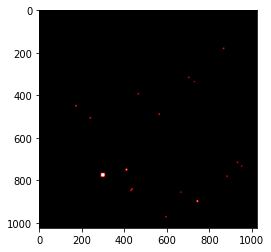

In [4]:
cropped_images = [] #Storing all the pixel values inside the bounding boxes
bb_images = []
for i in markup_images:
    tv_one,thresh_one = cv2.threshold(i,0,255,cv2.THRESH_BINARY)
    contours = cv2.findContours(thresh_one[:,:,0], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        cropped = i[y:y+h, x:x+w]
        cropped_images.append(cropped)
        bb_images.append(cv2.rectangle(i, (x,y), (x+w, y+h), (0, 0, 255), 2))
# Display the output image
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
    

In [5]:
bb_images = [cv2.cvtColor(x,cv2.COLOR_RGB2GRAY) for x in bb_images]
cropped_images = [cv2.cvtColor(x,cv2.COLOR_RGB2GRAY) for x in cropped_images]

In [6]:
#Normalising the images
bb_images = [x/255 for x in bb_images]
cropped_images = [x/255 for x in cropped_images]

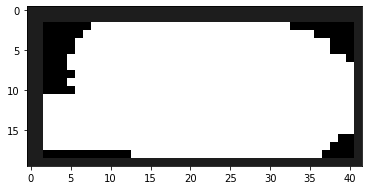

In [7]:
plt.imshow(cropped_images[2],cmap = 'gray')

In [8]:
def imageandMask(image_index,no_blobs): 
    experimental_image = bb_images[image_index]
    mask = np.zeros_like(experimental_image) #Creating an empty canvas
    for i in range(no_blobs):
        random.seed(42)
        h, w = cropped_images[random.randint(0,i)].shape[:2]
        x = np.random.randint(mask.shape[0] - w)
        y = np.random.randint(mask.shape[1] - h)
        random.seed(42)
        mask[y:y+h, x:x+w] = cropped_images[random.randint(0,i)]
    return mask

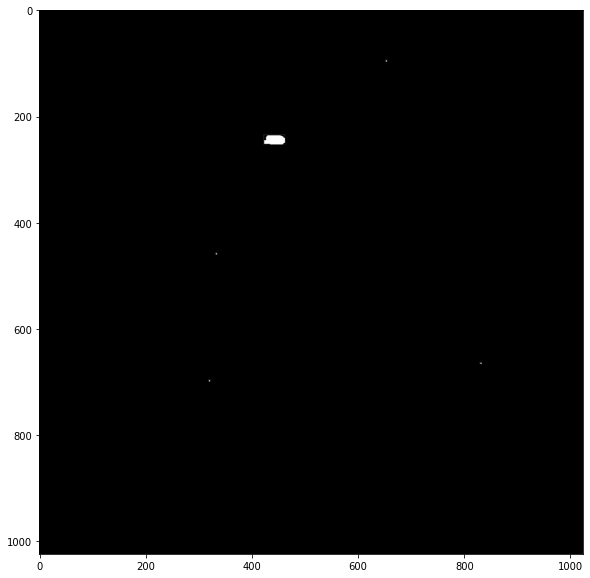

In [9]:
plt.figure(figsize = (10,10))
plt.imshow(imageandMask(10,5),cmap = 'gray')

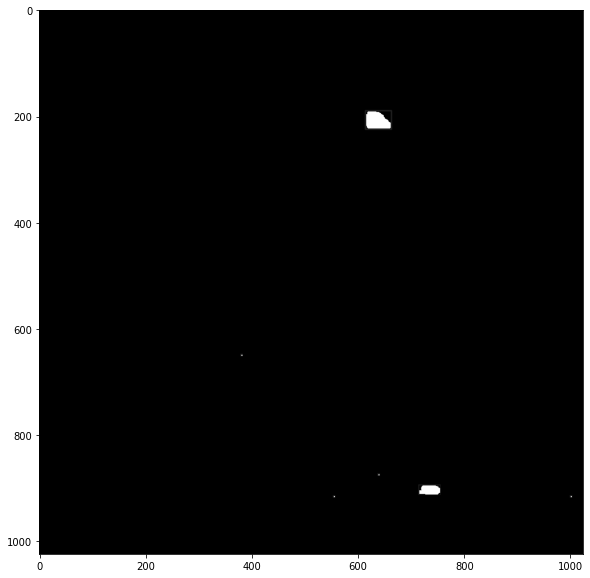

In [10]:
plt.figure(figsize = (10,10))
overlap = bb_images[3] + imageandMask(10,5)
plt.imshow(overlap,cmap = 'gray')

In [11]:
def simulation(no_times,image_index,no_blobs):
    count = 0
    for i in range(no_times):
        overlap = bb_images[image_index]+ imageandMask(image_index,no_blobs)
        if overlap.max()>1:
            count+=1
    print(count)
    plt.imshow(overlap,cmap = 'gray')

4


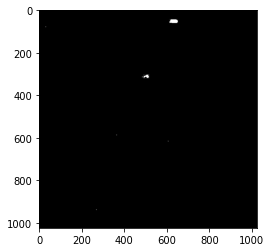

In [12]:
simulation(1000,1,5)

### 2nd Phase

In [19]:
#Creating a canvas
canvas = np.zeros(bb_images[1].shape[:2], np.uint8) # selecting one image from bb_images list as all images are of same dimension
blob_canvas = np.zeros_like(canvas) #Canvas with blob
for i in range(20):
    random.seed(42)
    h, w = cropped_images[random.randint(0,i)].shape[:2]
    x = np.random.randint(canvas.shape[0] - w)
    y = np.random.randint(canvas.shape[1] - h)
    random.seed(42)
    blob_canvas[y:y+h, x:x+w] = cropped_images[random.randint(0,i)]

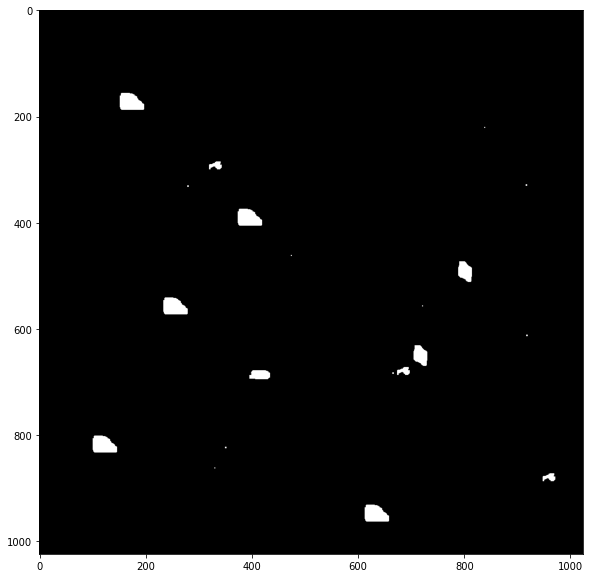

In [20]:
plt.figure(figsize = (10,10))
plt.imshow(blob_canvas,cmap = 'gray')

#### Creating two circular binary mask in an image

In [34]:
plt.figure(figsize = (10,10))
canvas = np.zeros(blob_canvas.shape[:2], dtype='uint8') #blob canvas is the canvas with all the original dots 
cv2.circle(canvas,(351,470),350,225, -1)
masked = cv2.bitwise_and(blob_canvas, blob_canvas, mask=canvas)


<Figure size 720x720 with 0 Axes>

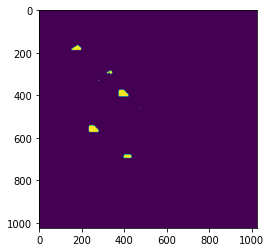

In [36]:
plt.imshow(masked)